In [1]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


plt.style.use ('fivethirtyeight')


In [2]:
#Get the stock quote

df = web.DataReader('ADA-USD',data_source='yahoo', start='2012-01-01', end = '2021-12-31')
df



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-30,0.032226,0.017354,0.021678,0.024969,5.006870e+07,0.024969
2017-10-01,0.030088,0.019969,0.024607,0.025932,5.764130e+07,0.025932
2017-10-02,0.027425,0.020690,0.025757,0.020816,1.699780e+07,0.020816
2017-10-03,0.022806,0.020864,0.020864,0.021931,9.000050e+06,0.021931
2017-10-04,0.022154,0.020859,0.021951,0.021489,5.562510e+06,0.021489
...,...,...,...,...,...,...
2021-09-26,2.271561,2.133972,2.212038,2.135905,2.990138e+09,2.135905
2021-09-27,2.172157,2.030042,2.133217,2.039139,3.092924e+09,2.039139
2021-09-28,2.144665,2.023027,2.039015,2.065688,2.869486e+09,2.065688


In [3]:
# Get the number of rows and columns in the data set
df.shape

(1458, 6)

Text(0.5, 0, 'Date')

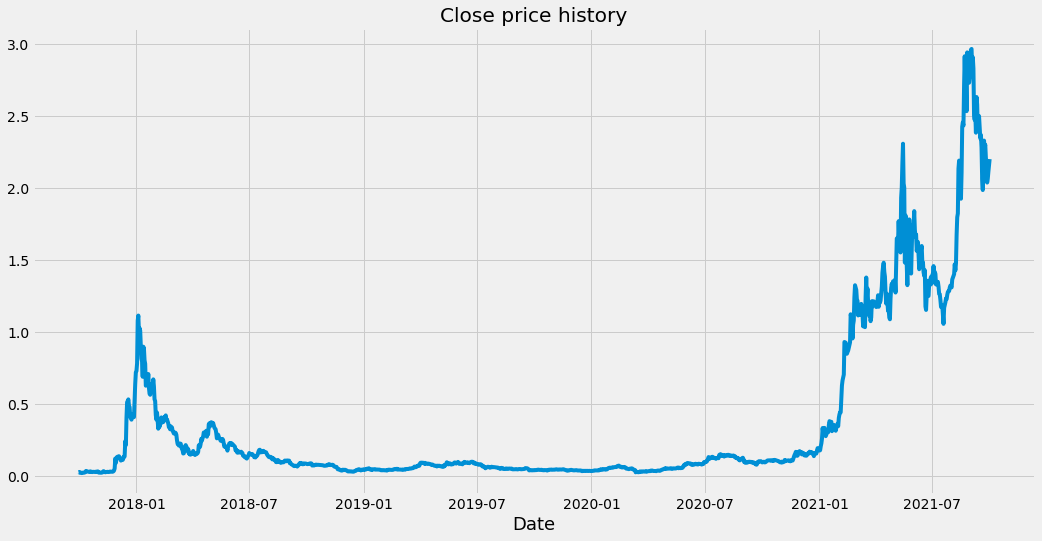

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
#plt.ylabel('Close Price USD ($)',18)

In [5]:
# Create a new dataframe with only the Close column

btc_close=df.filter(['Close'])

#Convert the dataframe to a numpy array

dataset = btc_close.values

# get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len


1167

In [6]:
#Scale the data

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00217988],
       [0.00250636],
       [0.00077194],
       ...,
       [0.69401934],
       [0.71055119],
       [0.74029172]])

In [7]:
#create the training data set
#Create the scaled data set

train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range (100,len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i , 0])



In [8]:
#conver the c_train and y_train to numpy arrays


x_train,y_train = np.array(x_train), np.array(y_train)
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1067, 100, 1)

In [9]:
#Build the LSTM model
model = Sequential()

model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1 )))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [11]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1067/1067 [==============================] - 25s 22ms/step - loss: 2.0965e-04


In [12]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 100 : ,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (100,len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    

In [13]:
#convert the data to numpy array 

x_test = np.array(x_test)
type(x_test)
x_test.shape


(291, 100)

In [14]:
#Reshape the Data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [15]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)




In [16]:
#Get root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.40274003091751504

C:\Users\JUANDI~1\AppData\Local\Temp/ipykernel_16884/2963163159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


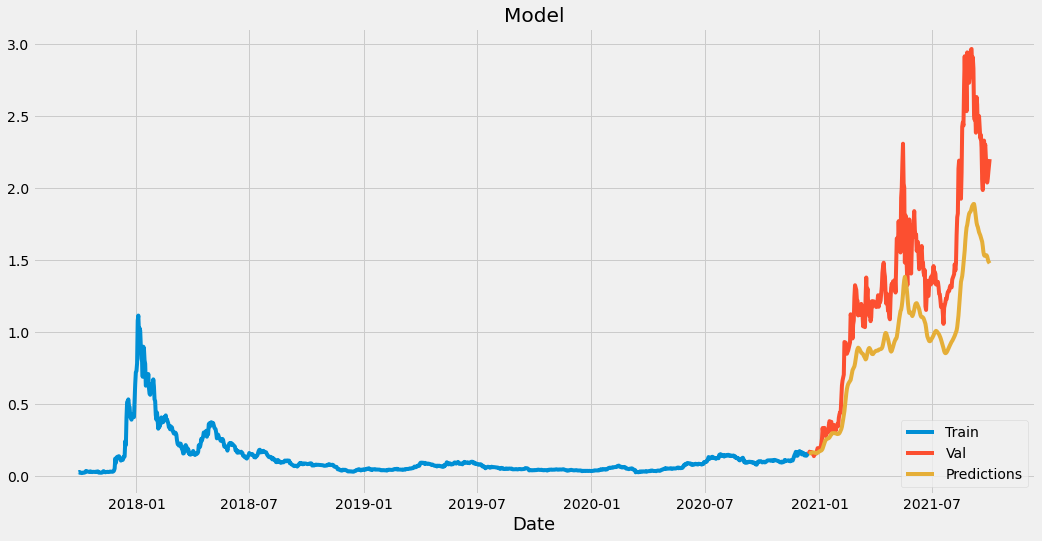

In [17]:
#Plot the data
train = btc_close[:training_data_len]
valid = btc_close[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel=('Close Price USD ($)',18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [18]:
#Show the valid and preficted prices
valid

,Close,Predictions
Date,,
2020-12-15,0.154305,0.154079
2020-12-16,0.167589,0.154890
2020-12-17,0.163483,0.156643
2020-12-18,0.164988,0.158429
2020-12-19,0.164714,0.160152
...,...,...
2021-09-26,2.135905,1.533561
2021-09-27,2.039139,1.525856
2021-09-28,2.065688,1.508836


In [23]:
#Get the quote
apple_quote=web.DataReader('ADA-USD',data_source='yahoo',start='2012-01-01',end='2021-09-25')
#create a new Dataframe
new_df = apple_quote.filter(['Close'])
npArr = new_df[-100:]
#Get the last 60 day closing price values and convert the dataframe to an array 


for i in range (0,20):
    last_100_days = npArr[-100:]
    #Scale the data to be values between 0 and 1
    last_100_days_scaled = scaler.transform(last_100_days)

    #create and empty list

    X_test = []
    #append the last 60days
    X_test.append(last_100_days_scaled)
    X_test = np.array(X_test)



    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    print(x_test[1])

    #Get the predicted scaled price

    pred_price = model.predict(X_test)

    #undo the scaling
    pred_price =scaler.inverse_transform(pred_price)
    npArr.append(pred_price)
    print(pred_price)


[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]
[[1.5335608]]


In [20]:
npArr


,Close
Date,
2021-06-18,1.390570
2021-06-19,1.429188
2021-06-20,1.177480
2021-06-21,1.153254
2021-06-22,1.252896
...,...
2021-09-21,2.266182
2021-09-22,2.330941
2021-09-23,2.281269


In [21]:
apple_quote2=web.DataReader('ADA-USD',data_source='yahoo',start='2021-09-24',end='2021-09-24')
print(apple_quote2['Close'])

Date
2021-09-23    2.281269
2021-09-24    2.301541
Name: Close, dtype: float64


In [ ]:



date = apple_quote2['Date']
jeje= date.values[-1]